<a href="https://colab.research.google.com/github/soleme/web-ai-hub/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요 모듈 가져오기

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# 데이터 준비

(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


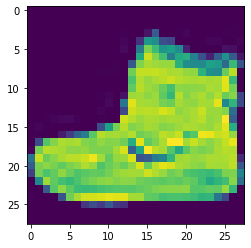

In [ ]:
plt.imshow(trainX[0])

In [ ]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
trainX = trainX.reshape((60000, 28*28))
testX = testX.reshape((10000, 28*28))
print(trainX.shape)

(60000, 784)


In [ ]:
trainX = trainX/255
testX = testX/255

In [ ]:
trainX[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# 모델1 만들기

X = tf.keras.Input(shape=[28*28])
H = tf.keras.layers.Dense(128, activation='swish')(X)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X, Y)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


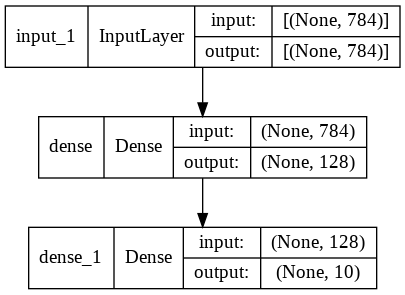

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 학습

hist1 = model.fit(trainX, trainY, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4827 - accuracy: 0.8277
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3608 - accuracy: 0.8690
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3238 - accuracy: 0.8808
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2984 - accuracy: 0.8891
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8959
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2640 - accuracy: 0.9019
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2503 - accuracy: 0.9052
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2383 - accuracy: 0.9102
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2280 - accuracy: 0.9143
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.219

In [ ]:
# 모델 평가

model.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8862


[0.3376765251159668, 0.8862000107765198]

In [ ]:
preds = model.predict(testX)

In [ ]:
preds[0]  ##예측값

array([1.6217387e-08, 3.2094412e-08, 1.1160033e-08, 7.2671583e-08,
       2.8106362e-07, 1.7927949e-04, 3.0955318e-09, 4.6714229e-04,
       4.2480881e-09, 9.9935311e-01], dtype=float32)

In [ ]:
np.argmax(preds[0])

9

In [ ]:
testY[0]

9

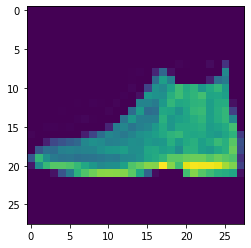

In [ ]:
plt.imshow(testX[0].reshape(28,28))
plt.show()

In [ ]:
# 모델2 만들기

X = tf.keras.Input(shape=[28*28])
H = tf.keras.layers.Dense(256, activation='swish')(X)
H = tf.keras.layers.Dense(128, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X, Y)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
## 모델 2 학습

hist2 = model.fit(trainX, trainY, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4632 - accuracy: 0.8316
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3401 - accuracy: 0.8736
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3020 - accuracy: 0.8863
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2778 - accuracy: 0.8957
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2558 - accuracy: 0.9038
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2411 - accuracy: 0.9094
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2252 - accuracy: 0.9140
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2118 - accuracy: 0.9196
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2012 - accuracy: 0.9227
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.191

In [ ]:
## 모델 평가

model.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.3259 - accuracy: 0.8895


[0.32588496804237366, 0.8895000219345093]

In [ ]:
preds = model.predict(testX)
preds[1]

array([1.5921622e-05, 1.9245993e-14, 9.9945170e-01, 5.0613468e-11,
       4.1514056e-04, 2.5047206e-12, 1.1725048e-04, 1.8155945e-16,
       5.2986513e-12, 4.6205851e-13], dtype=float32)

In [ ]:
np.argmax(preds[2])

1

In [ ]:
testY[2]

1

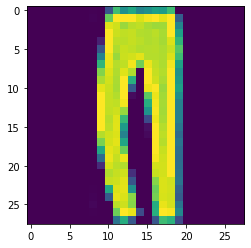

In [ ]:
plt.imshow(testX[2].reshape(28,28))
plt.show()

In [ ]:
## 모델 3 만들기

X = tf.keras.Input(shape=[28*28])
H = tf.keras.layers.Dense(256, activation='swish')(X)
dropout = tf.keras.layers.Dropout(rate=0.5)(X)
H = tf.keras.layers.Dense(128, activation='swish')(H)
dropout = tf.keras.layers.Dropout(rate=0.3)(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.Model(X, Y)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(trainX, trainY, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4601 - accuracy: 0.8317
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3420 - accuracy: 0.8720
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3043 - accuracy: 0.8859
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2772 - accuracy: 0.8956
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2568 - accuracy: 0.9020
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2413 - accuracy: 0.9098
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2271 - accuracy: 0.9135
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2115 - accuracy: 0.9198
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2018 - accuracy: 0.9228
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.192

In [ ]:
model.evaluate(testX, testY)

313/313 [==============================] - 1s 2ms/step - loss: 0.3178 - accuracy: 0.8934


[0.31783464550971985, 0.8934000134468079]